# クラス比重み付け最小二乗分類を線形モデルに適用

In [1]:
import numpy as np
import sys,os
sys.path.append(os.pardir)
#from tools.utils.plot.boundary_plot import BinaryDataPlotter
from tools.models.classifiers.class_weighted_linear_classifier import ClassWeightedLinearClassifier

In [2]:
def generate(n,pi=0.9,pos_mu=[-2,0],neg_mu=[2,0],sigma=[[1,0],[0,2]],seed=None):
    np.random.seed(seed)
    n_majority=int(n*pi)
    n_minority=n-n_majority
    X_train_pos=np.random.multivariate_normal(pos_mu, sigma, n_majority)
    X_train_neg=np.random.multivariate_normal(neg_mu, sigma, n_minority)
    X_test_pos=np.random.multivariate_normal(pos_mu, sigma, n_minority)
    X_test_neg=np.random.multivariate_normal(neg_mu, sigma, n_majority)
    X_train = np.concatenate([X_train_pos,X_train_neg])
    y_train = np.concatenate([np.ones(n_majority),-np.ones(n_minority)])
    X_test = np.concatenate([X_test_pos,X_test_neg])
    y_test = np.concatenate([np.ones(n_minority),-np.ones(n_majority)])
    return X_train,y_train,X_test,y_test

In [3]:
import matplotlib.pyplot as plt
import numpy as np


class BinaryLabeledPlotter:
    """binary dataをplotする.分類境界も表示(境界が直線のとき可能)."""

    def __init__(self, pos_color="blue", neg_color="red",line_styles=["solid","dashed"],line_colors=["green","black"]):
        self.pos_color = pos_color
        self.neg_color = neg_color
        self.line_styles=line_styles
        self.line_colors=line_colors

    def plot(self, X, y, title, models=None):
        """
        y={1,-1}, 
        dim x = 2

        f(1,x1,x2) = theta[1] * x1 + theta[2] * x2 + theta[0]  
        """
        x1 = X[:, 0]
        x2 = X[:, 1]
        fig = plt.figure()
        ax = fig.add_subplot(111)

        ax.scatter(x1[y == 1], x2[y == 1], color=self.pos_color, marker="o")
        ax.scatter(x1[y == -1], x2[y == -1], color=self.neg_color, marker="x")
        if models is not None:
            for i,d in enumerate(models): 
                theta=d["theta"]
                model=d["model"]
                x = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
                y = -(theta[1] * x + theta[0]) / theta[2]
                ax.plot(x, y, color=self.line_colors[i],linestyle=self.line_styles[i],label=model)

        plt.title(title)
        plt.legend()
        plt.xlabel("x1")
        plt.ylabel("x2")
        plt.show()


In [4]:
N=100
SEED=0

In [5]:
X_train,y_train,X_test,y_test=generate(n=N,seed=SEED)

In [6]:
plotter=BinaryLabeledPlotter()

/Users/hikaru/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


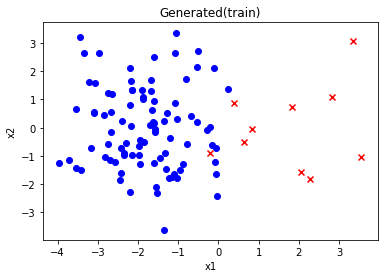

In [7]:
plotter.plot(X_train,y_train,title="Generated(train)")

/Users/hikaru/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


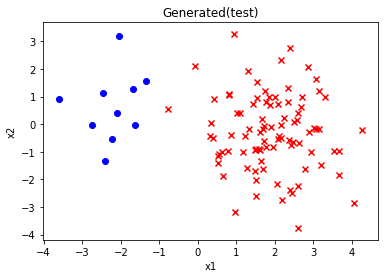

In [8]:
plotter.plot(X_test,y_test,title="Generated(test)")

In [9]:
model=ClassWeightedLinearClassifier()

In [10]:
model.fit(X_train,y_train)

0.9


In [11]:
pred=model.predict(X_test)

estimated pi: 0.069


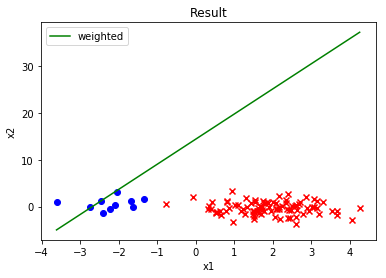

In [12]:
models=[{"theta":model.theta,"model":"weighted"}]
plotter.plot(X_test,y_test,title="Result",models=models)